In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

In [5]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 626


In [6]:
url = "https://api.openweathermap.org/data/2.5/weather?"
units = "metric"

In [9]:
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_key}&q={city}&units={units}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        
        weather_response = requests.get(city_url)
        weather_json = weather_response.json()
        
        # Parse the JSON and retrieve data
        city_weather = weather_json['weather'][0]['main']

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = weather_json['coord']['lat']
        city_lng = weather_json['coord']['lon']
        city_max_temp = weather_json['main']['temp_max']
        city_humidity = weather_json['main']['humidity']
        city_clouds = weather_json['clouds']['all']
        city_wind = weather_json['wind']['speed']
        city_country = weather_json['sys']['country']
        city_date = weather_json['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | puerto natales
Processing Record 2 of Set 1 | hohhot
Processing Record 3 of Set 1 | kasane
Processing Record 4 of Set 1 | carnarvon
Processing Record 5 of Set 1 | dunedin
Processing Record 6 of Set 1 | new norfolk
Processing Record 7 of Set 1 | adamstown
Processing Record 8 of Set 1 | ushuaia
Processing Record 9 of Set 1 | ambovombe
Processing Record 10 of Set 1 | afaahiti
Processing Record 11 of Set 1 | yellowknife
Processing Record 12 of Set 1 | suva
Processing Record 13 of Set 1 | iqaluit
Processing Record 14 of Set 1 | velyka mykhaylivka
Processing Record 15 of Set 1 | bethel
Processing Record 16 of Set 1 | bilibino
Processing Record 17 of Set 1 | pedernales
Processing Record 18 of Set 1 | port-aux-francais
Processing Record 19 of Set 1 | susuman
Processing Record 20 of Set 1 | aasiaat
Processing Record 21 of Set 1 | port elizabeth
Processing Record 22 of Set 1 | jwaneng
Processing Record 23 

Processing Record 40 of Set 4 | dame-marie
Processing Record 41 of Set 4 | harstad
Processing Record 42 of Set 4 | milaor
Processing Record 43 of Set 4 | murghob
Processing Record 44 of Set 4 | kalymnos
Processing Record 45 of Set 4 | zheleznodorozhnyy
Processing Record 46 of Set 4 | acapulco de juarez
Processing Record 47 of Set 4 | bima
Processing Record 48 of Set 4 | minas de marcona
Processing Record 49 of Set 4 | lincoln city
Processing Record 0 of Set 5 | weno
Processing Record 1 of Set 5 | palo santo
Processing Record 2 of Set 5 | mar del plata
Processing Record 3 of Set 5 | ploudalmezeau
Processing Record 4 of Set 5 | rutland
Processing Record 5 of Set 5 | axim
Processing Record 6 of Set 5 | keren
Processing Record 7 of Set 5 | suoyarvi
Processing Record 8 of Set 5 | lazaro cardenas
Processing Record 9 of Set 5 | asyqata
Processing Record 10 of Set 5 | yashkul'
Processing Record 11 of Set 5 | sao joao da barra
Processing Record 12 of Set 5 | salym
Processing Record 13 of Set 5 

Processing Record 30 of Set 8 | acala
Processing Record 31 of Set 8 | ierapetra
Processing Record 32 of Set 8 | tura
Processing Record 33 of Set 8 | jakobstad
Processing Record 34 of Set 8 | holualoa
Processing Record 35 of Set 8 | mahibadhoo
Processing Record 36 of Set 8 | san lawrenz
Processing Record 37 of Set 8 | yazoo city
Processing Record 38 of Set 8 | vaskelovo
Processing Record 39 of Set 8 | bubaque
Processing Record 40 of Set 8 | craig
Processing Record 41 of Set 8 | gadzhiyevo
Processing Record 42 of Set 8 | wuyang
Processing Record 43 of Set 8 | katabu
Processing Record 44 of Set 8 | lucapa
Processing Record 45 of Set 8 | irati
Processing Record 46 of Set 8 | dakhla
Processing Record 47 of Set 8 | nabire
Processing Record 48 of Set 8 | sumbawa besar
Processing Record 49 of Set 8 | tanjung pandan
Processing Record 0 of Set 9 | tataouine
Processing Record 1 of Set 9 | semera
Processing Record 2 of Set 9 | lerwick
Processing Record 3 of Set 9 | howard springs
Processing Record

Processing Record 20 of Set 12 | belyy yar
Processing Record 21 of Set 12 | loikaw
Processing Record 22 of Set 12 | sur
Processing Record 23 of Set 12 | brisas barra de suchiate
Processing Record 24 of Set 12 | enewetak
Processing Record 25 of Set 12 | waterloo
Processing Record 26 of Set 12 | bondo
Processing Record 27 of Set 12 | duncan town
City not found. Skipping...
Processing Record 28 of Set 12 | lianzhou
Processing Record 29 of Set 12 | bayan nur
City not found. Skipping...
Processing Record 30 of Set 12 | gamay
Processing Record 31 of Set 12 | papao
Processing Record 32 of Set 12 | douz
Processing Record 33 of Set 12 | ilhabela
Processing Record 34 of Set 12 | yulinshi
Processing Record 35 of Set 12 | le morne-rouge
Processing Record 36 of Set 12 | dudinka
Processing Record 37 of Set 12 | murygino
Processing Record 38 of Set 12 | quang ngai
Processing Record 39 of Set 12 | ayacucho
Processing Record 40 of Set 12 | road town
Processing Record 41 of Set 12 | mount gambier
Proces

In [11]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          600
Lat           600
Lng           600
Max Temp      600
Humidity      600
Cloudiness    600
Wind Speed    600
Country       600
Date          600
dtype: int64

In [12]:
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,puerto natales,-51.7236,-72.4875,4.25,81,40,2.57,CL,1685038384
1,hohhot,40.8106,111.6522,13.64,37,57,0.69,CN,1685038384
2,kasane,-17.8167,25.1500,17.05,48,0,1.54,BW,1685038384
3,carnarvon,-24.8667,113.6333,21.03,49,95,9.21,AU,1685038384
4,dunedin,-45.8742,170.5036,17.67,35,100,2.68,NZ,1685038384


In [13]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [14]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,puerto natales,-51.7236,-72.4875,4.25,81,40,2.57,CL,1685038384
1,hohhot,40.8106,111.6522,13.64,37,57,0.69,CN,1685038384
2,kasane,-17.8167,25.1500,17.05,48,0,1.54,BW,1685038384
3,carnarvon,-24.8667,113.6333,21.03,49,95,9.21,AU,1685038384
4,dunedin,-45.8742,170.5036,17.67,35,100,2.68,NZ,1685038384


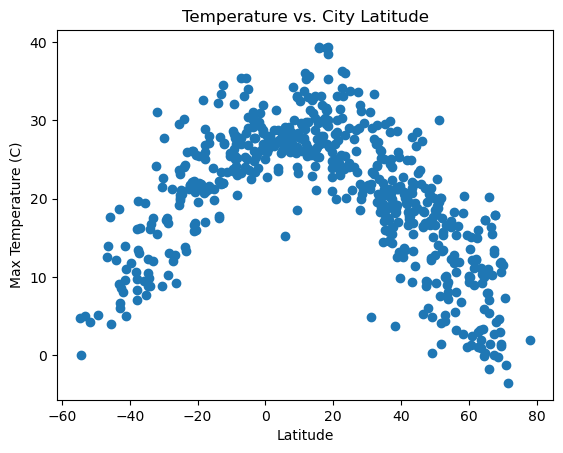

In [46]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'],city_data_df['Max Temp'])

# Incorporate the other graph properties
plt.title("Temperature vs. City Latitude")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

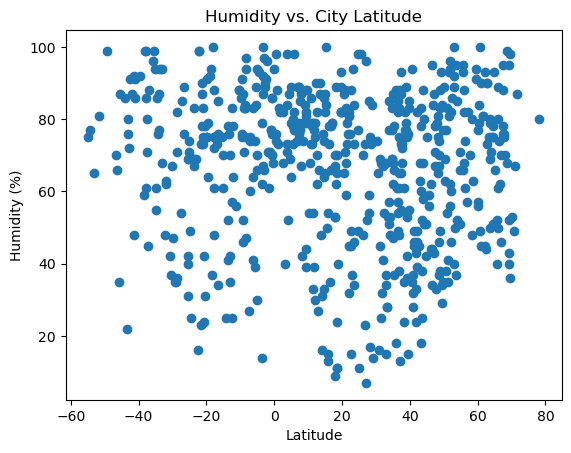

In [45]:
plt.scatter(city_data_df['Lat'],city_data_df['Humidity'])

# Incorporate the other graph properties
plt.title("Humidity vs. City Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

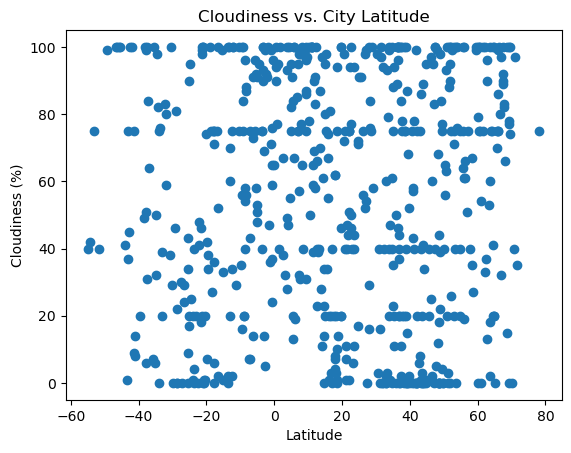

In [44]:
plt.scatter(city_data_df['Lat'],city_data_df['Cloudiness'])

# Incorporate the other graph properties
plt.title("Cloudiness vs. City Latitude")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

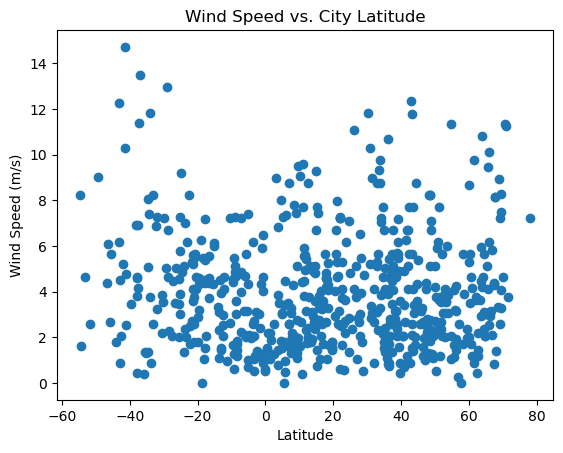

In [43]:
plt.scatter(city_data_df['Lat'],city_data_df['Wind Speed'])

# Incorporate the other graph properties
plt.title("Wind Speed vs. City Latitude")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

In [38]:
# Define a function to create Linear Regression plots

def regressPlot(df, xColumn, yColumn):
    x_values = df[xColumn]
    y_values = df[yColumn]
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
    plt.title(f'{yColumn} vs. {xColumn}')
    plt.xlabel(f'{xColumn}')
    plt.ylabel(f'{yColumn}')
    print(f"The r-squared is: {rvalue**2}")
    plt.show()

In [20]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = pd.DataFrame(city_data_df.loc[(city_data_df['Lat'] >= 0)])

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,hohhot,40.8106,111.6522,13.64,37,57,0.69,CN,1685038384
10,yellowknife,62.4560,-114.3525,14.91,44,37,0.43,CA,1685038291
12,iqaluit,63.7506,-68.5145,0.85,80,100,4.47,CA,1685038386
13,velyka mykhaylivka,47.0794,29.8514,16.90,87,83,1.01,UA,1685038349
14,bethel,41.3712,-73.4140,19.39,49,0,6.26,US,1685038386


In [21]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = pd.DataFrame(city_data_df.loc[(city_data_df['Lat'] < 0)])

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,puerto natales,-51.7236,-72.4875,4.25,81,40,2.57,CL,1685038384
2,kasane,-17.8167,25.1500,17.05,48,0,1.54,BW,1685038384
3,carnarvon,-24.8667,113.6333,21.03,49,95,9.21,AU,1685038384
4,dunedin,-45.8742,170.5036,17.67,35,100,2.68,NZ,1685038384
5,new norfolk,-42.7826,147.0587,6.72,72,45,0.89,AU,1685038384


The r-squared is: 0.6412752367435535


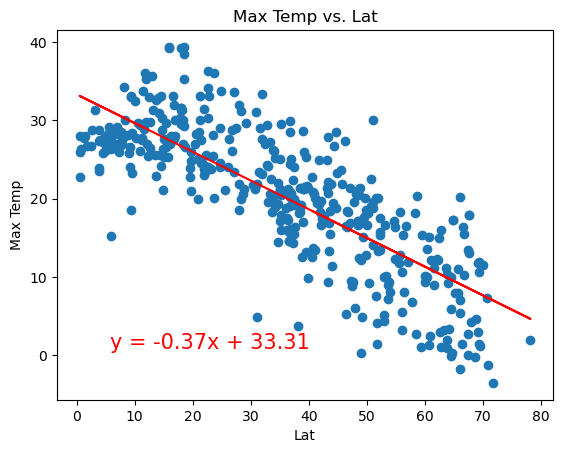

In [39]:
# Linear regression on Northern Hemisphere
regressPlot(northern_hemi_df, 'Lat', 'Max Temp')

The r-squared is: 0.6714352682237417


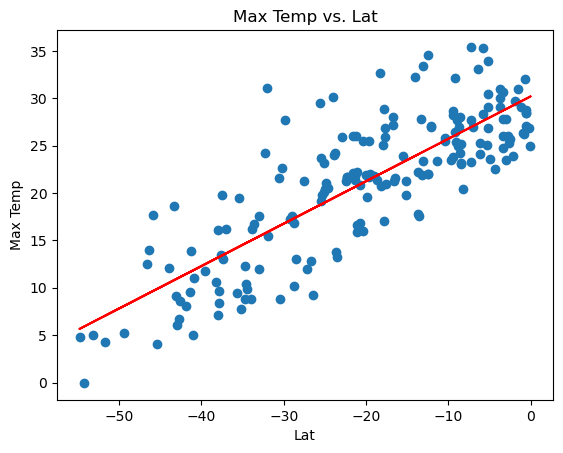

In [40]:
# Linear regression on Southern Hemisphere
regressPlot(southern_hemi_df, 'Lat', 'Max Temp')

The r-squared values are both very similar, even if their relationship are technically different. This shows the temperature does increase as you get closer to the equator and decreases further.

The r-squared is: 0.0005539520949480433


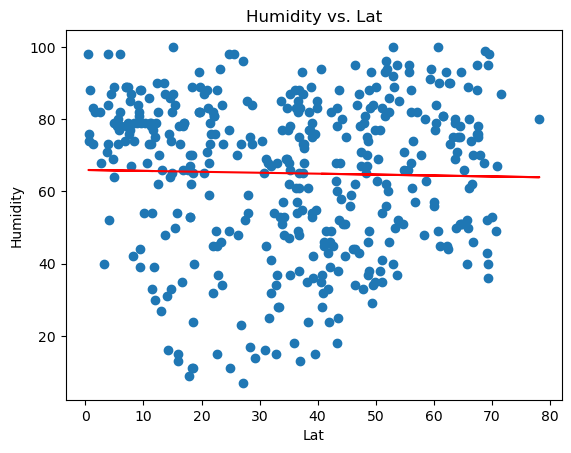

In [31]:
regressPlot(northern_hemi_df, 'Lat', 'Humidity')

The r-squared is: 2.135229842084132e-06


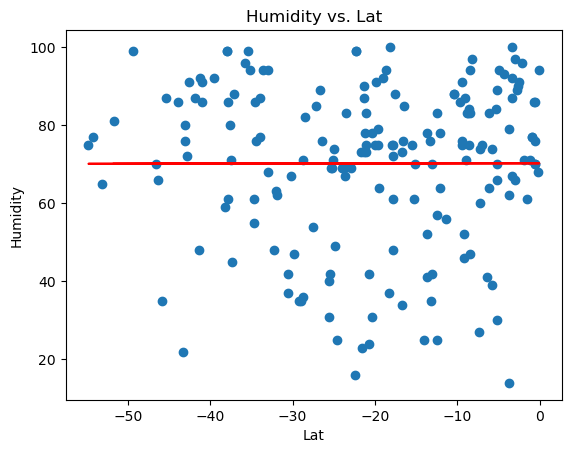

In [33]:
regressPlot(southern_hemi_df, 'Lat', 'Humidity')

Neither r-squared value is indicative of any real relationship between humidity levels and latitude.

The r-squared is: 0.001712309556509106


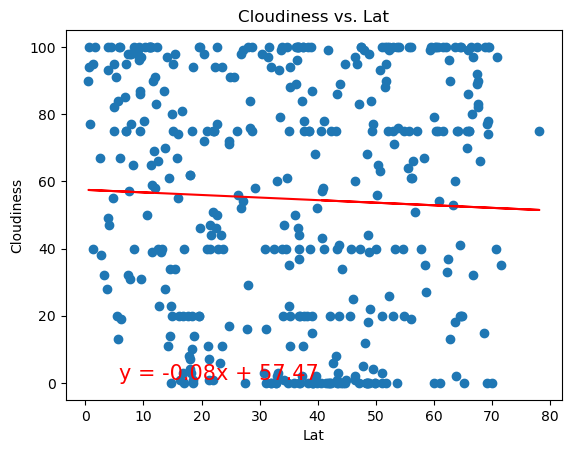

In [34]:
regressPlot(northern_hemi_df, 'Lat', 'Cloudiness')

The r-squared is: 0.011235464668873912


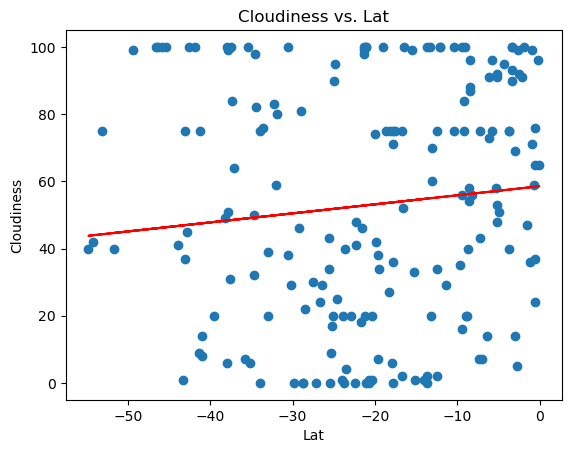

In [35]:
regressPlot(southern_hemi_df, 'Lat', 'Cloudiness')

Neither r-squared value shows any sign of a relationship between cloudiness and latitude.

The r-squared is: 0.006594276848459026


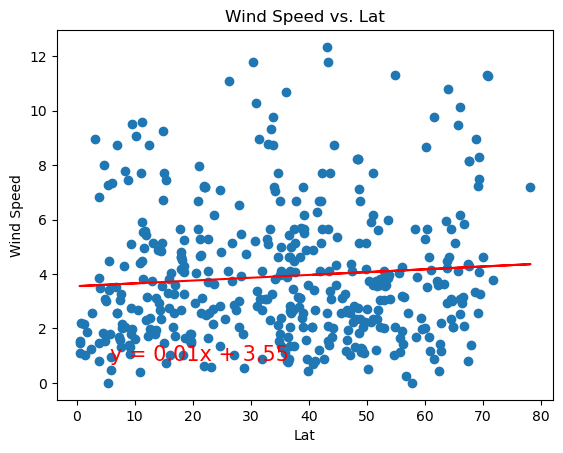

In [41]:
regressPlot(northern_hemi_df, 'Lat', 'Wind Speed')

The r-squared is: 0.11862595107165524


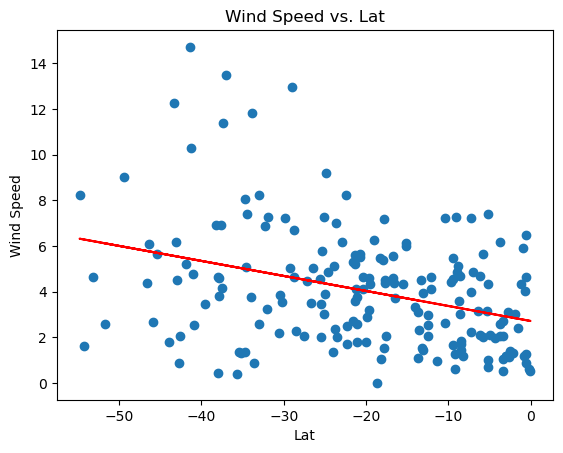

In [42]:
regressPlot(southern_hemi_df, 'Lat', 'Wind Speed')

The second graph technically indicates a relevant relationship between Wind Speed and Latitude, but I believe this is more of a result from noticeably less datapoints along with some of those points being on the extreme sign.